# Quantum Harmonic Oscillator
## Zain Fox-Latif | 21018444
In this assignment, the calculations concerning the local minima of the energy of a quantum harmonic oscillator were undertaken using computational methods like bisection and multi-dimensional optimisation. 

Beginning with the Hamiltonian
$$ \begin{equation} H = -\frac{1}{2} \frac{d}{dx} + \frac{1}{2}\omega^2x^2 \end{equation} $$

and setting $ \omega = 1 $, one can find the solution to be a Gaussian

$$ \begin{equation} \psi(x) = (2\alpha/\pi)^{\frac{1}{4}} e^{-\alpha x^2}. \end{equation}$$

From this, the ground state energy $E_{gs}$ can be extracted

$$ \begin{equation} E_{gs} = \frac{\alpha}{2} + \frac{1}{8\alpha} \end{equation} $$

Later, when considering the two-dimensional quantum harmonic oscillator, one can use 

$$ \begin{equation} \psi(x, y) = (2\alpha/\pi)^{\frac{1}{4}} e^{-\alpha x^2} (2\beta/\pi)^{\frac{1}{4}} e^{-\beta y^2} \end{equation} $$

and its corresponding ground state energy $E_{gs}$

$$ \begin{equation} E_{gs} = \frac{\alpha}{2} + \frac{1}{8\alpha} + \frac{\beta}{2} + \frac{1}{8\beta} \end{equation} $$




### Section on 1D QHO
$ \mathrm{(3)} $ was used alongside the first derivative of this equation 

$$
\begin{equation}
\frac{dE}{d\alpha} = \frac{1}{2} - \frac{1}{8 \alpha^2}
\end{equation}
$$

in the section below. Once the first derivative had been calculated, it was plotted for a fixed interval of $\alpha$ to ascertain suitable brackets for the bisection method. This was then carried out, and a minimum value for energy calculated by substituting back into $ \mathrm{(3)} $.

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [66]:
def bisection(fun, a: float, b: float, tol: float) -> tuple:
   """
   Calculates the roots of a function using the bisection
   method, using two brackets on either side of the root

   Inputs:
   fun   Function with roots to be calculated
   a:    Bracket 1
   b:    Bracket 2
   tol:  Tolerance of the function

   Outputs:
   n     Number of iterations
   c     Root of the function
   """
   # Evaluating the function at a and b
   f_a = fun(a)
   f_b = fun(b)

   # Initialising counter
   n = 0 

   # Bisection algorithm from class exercises
   c = (a + b)/2
   while abs(fun(c)) >= tol:
      if fun(c)*fun(a) > 0: # Checking for same signs
         a = c
      else:
         b = c
      c = (a + b)/2
      n+=1
   
   return n, c

In [67]:
def QHO_E(alpha: float) -> float:
    """
    Returns the ground state energy
    of a quantum harmonic oscillator
    at a given point

    Inputs:
    alpha   Given point

    Outputs:
    E       Energy at given point
    """
    
    E = alpha/2 + 1/(8*alpha)
    return E

In [68]:
def QHO_grad(alpha: float) -> float:
    """
    Returns the gradient of the ground
    state energy of a quantum harmonic
    oscillator at a given point

    Inputs:
    alpha   Given point

    Outputs:
    dE      First derivative of the energy
            with respect to alpha
    """
    
    dE = 1/2 - 1/(8*alpha**2)
    return dE

Text(0, 0.5, '$\\frac{\\mathrm{d}E}{\\mathrm{d\\alpha}}$')

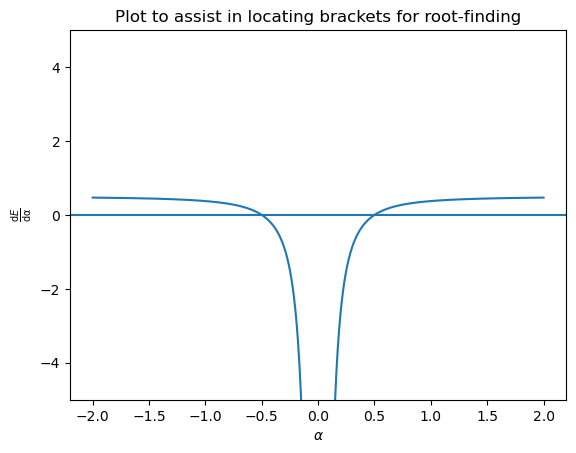

In [69]:
# Initialising coordinate space
x = np.linspace(-2, 2, 1000)
y = QHO_grad(x)

# Plotting the graph to estimate brackets
plt.plot(x, y)
plt.axhline()
plt.ylim((-5, 5))
plt.title("Plot to assist in locating brackets for root-finding")
plt.xlabel(r"$\alpha$")
plt.ylabel(r"$\frac{\mathrm{d}E}{\mathrm{d\alpha}}$")

In [70]:
# Performing bisection technique and returning results
n, alpha = bisection(QHO_grad, 0.25, 1, 0.001)
print("Number of iterations: {}".format(n))
print("Root: {}".format(alpha))
print("Minimum value of energy: {}".format(QHO_E(alpha)))

Number of iterations: 8
Root: 0.50048828125
Minimum value of energy: 0.5000002381859756


### Section on 2D QHO
Now, $\mathrm{(5)}$ and its vector gradient was used in a similar way with $\mathrm{(3)}$. A visualisation aided with the location of the local minimum of the function, which was then placed into a minimizing function to locate local minima. 

In [76]:
def QHO_2D_grad(x: list) -> list:
     """
     Inputs:
     x:   Array containing 2D meshgrid
          for alpha and beta

     Outputs
     dE:  Vector gradient of energy
     """

     # Arrays from the meshgrid
     alpha = x[0]
     beta = x[1]

     dE = np.array([1/2- 1/(8*alpha**2), 1/2 - 1/(8*beta**2)])

     return dE

In [72]:
def QHO_2D_E(x: list) -> float:
     """
     Inputs:
     x:   Array containing 2D meshgrid
          for alpha and beta

     Outputs
     E:   Energy
     """

     # Arrays from the meshgrid
     alpha = x[0]
     beta = x[1]

     E = alpha/2 + 1/(8*alpha) + beta/2 + 1/(8*beta)

     return E

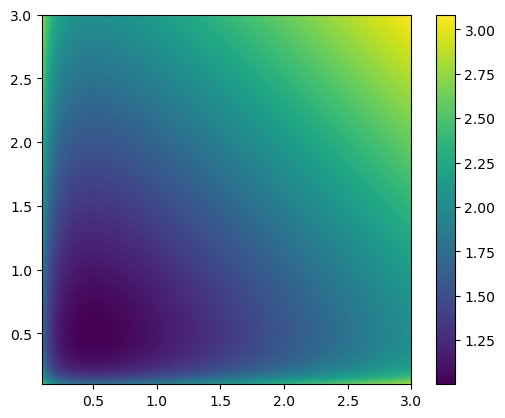

In [73]:
# Setting up coordinate system
x2 = np.linspace(0.1, 3, 1000)
y2 = np.linspace(0.1, 3, 1000)
x2D, y2D = np.meshgrid(x2, y2)

# Calculating and plotting energy
energy = QHO_2D_E([x2D, y2D])
plt.imshow(energy, origin='lower', extent=(0.1, 3, 0.1, 3))
plt.colorbar()

In [74]:
x0 = np.array([0.75, 0.75]) # Starting point estimated from purple area
opt_result = optimize.minimize(QHO_2D_E , x0, method='CG', jac=QHO_2D_grad)

In [75]:
# Results of optimize function
print("Success: {}".format(opt_result.success))
print("Guess: {}".format(opt_result.x))
print("Number of iterations: {}".format(opt_result.nit))

Success: True
Guess: [0.50000061 0.50000061]
Number of iterations: 3


### Conclusions
Overall, this assignment provides a good opportunity to understand the mathematics associated with the quantum harmonic oscillator. In both the 1D and 2D cases, mathematical techniques could be applied to extract insights from the functions, such that the local minima could be extracted from both with relative ease. Both techniques offered concordant results for the local minima of the ground state energy of the quantum harmonic oscillator, which intuitively presents the most stable state of the system.